## Employee Retention

### Goal

Employee turn-over is a very costly problem for companies. The cost of replacing an employee is often huge, taking into account the time spent to interview and find a replacement, placement fees, sign-on bonuses, the loss of productivity for several months and impact on company morale when you see coworkers leave. 

It is only natural then that data science has started being applied to this area. Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as planning new hiring in advance. This application of DS is often called people analytics or people data science (if you see a job title: people data scientist, this is the job). 

In this challenge, you have a data set with info about the employees and you have to predict when employees are going to quit by understanding the main drivers of employee churn. 


### Challenge Description

We got employee data from a few companies. We have data about all employees who joined from 2011/01/24 to 2015/12/13. For each employee, we also know if they are still at the company as of 2015/12/13 or they have quit. Beside that, we have general info about the employee, such as avg salary during her tenure, dept, and yrs of experience. 

As said above, the goal is to predict employee retention and understand its main drivers. Specifically, you should:


1. [Assume, for each company, that the headcount starts from zero on 2011/01/23. Estimate employee headcount, for each company on each day, from 2011/01/24 to 2015/12/13. That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have already quit, then company headcount on 2012/03/02 for company 1 would be 1000. You should create a table with 3 columns: day, employee_headcount, company_id](#1)


2. [What are the main factors that drive employee churn? Do they make sense? Explain your findings](#2)


3. [If you could add to this data set just one variable that could help explain employee churn, what would that be? ](#3)

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#display two decimal places
pd.set_option('precision',2)

In [2]:
df = pd.read_csv("employee_retention.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   employee_id  24702 non-null  float64
 1   company_id   24702 non-null  int64  
 2   dept         24702 non-null  object 
 3   seniority    24702 non-null  int64  
 4   salary       24702 non-null  float64
 5   join_date    24702 non-null  object 
 6   quit_date    13510 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [4]:
#convert two date columns to pandas datetime objects
df[['join_date','quit_date']] = df[['join_date','quit_date']].apply(pd.to_datetime)

In [5]:
df.describe(datetime_is_numeric=True)

,employee_id,company_id,seniority,salary,join_date,quit_date
count,24702.00,24702.00,24702.00,24702.00,24702,13510
mean,501604.40,3.43,14.13,138183.35,2013-06-29 09:39:37.556460800,2014-05-02 17:43:38.327161088
min,36.00,1.00,1.00,17000.00,2011-01-24 00:00:00,2011-10-13 00:00:00
25%,250133.75,1.00,7.00,79000.00,2012-04-09 00:00:00,2013-06-28 00:00:00
50%,500793.00,2.00,14.00,123000.00,2013-06-24 00:00:00,2014-06-20 00:00:00
75%,753137.25,5.00,21.00,187000.00,2014-09-17 00:00:00,2015-03-27 00:00:00
max,999969.00,12.00,99.00,408000.00,2015-12-10 00:00:00,2015-12-09 00:00:00
std,288909.03,2.70,8.09,76058.18,NaN,NaN


In [6]:
#fill NA with data pull date 2015/12/13
# df['quit_date'].fillna(value=pd.to_datetime('12/13/2015'), inplace=True)

#generate a column for days with the firm 
df['duration'] = df['quit_date'] - df['join_date']
df['duration'] = df['duration'] / np.timedelta64(1,'D')

In [7]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,duration
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585.0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340.0
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389.0
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040.0


#### Check Relative Frequency

In [8]:
#employee who left
off_df = df[~df['duration'].isnull()]

In [9]:
def percent(factor):
    a = pd.DataFrame(off_df.groupby(factor).size().reset_index(name = "left"))
    b = pd.DataFrame(df.groupby(factor).size().reset_index(name = "total"))
    c = a.merge(b, on = factor)
    c['%left'] =c['left']/c['total']*100
    print(c.sort_values(by = '%left', ascending = False))
    return 

In [10]:
percent('dept')

               dept  left  total  %left
5             sales  1811   3172  57.09
2            design   778   1380  56.38
4         marketing  1783   3167  56.30
0  customer_service  5094   9180  55.49
1      data_science  1682   3190  52.73
3          engineer  2362   4613  51.20


In [11]:
percent('company_id')

    company_id  left  total  %left
10          11    12     16  75.00
6            7   692   1224  56.54
4            5   983   1755  56.01
3            4  1153   2062  55.92
2            3  1531   2749  55.69
9           10   480    865  55.49
7            8   579   1047  55.30
5            6   712   1291  55.15
8            9   529    961  55.05
0            1  4621   8486  54.45
1            2  2206   4222  52.25
11          12    12     24  50.00


In [12]:
percent('seniority')

    seniority  left  total   %left
30         99     1      1  100.00
29         98     1      1  100.00
5           6   571    950   60.11
11         12   583    988   59.01
20         21   455    782   58.18
7           8   586   1008   58.13
15         16   534    936   57.05
4           5   533    936   56.94
9          10   523    927   56.42
24         25   403    715   56.36
12         13   500    894   55.93
19         20   469    844   55.57
14         15   505    911   55.43
10         11   512    924   55.41
8           9   522    944   55.30
13         14   508    920   55.22
6           7   511    928   55.06
22         23   430    785   54.78
27         28   320    585   54.70
18         19   497    910   54.62
23         24   398    743   53.57
16         17   478    893   53.53
26         27   342    642   53.27
1           2   500    942   53.08
21         22   405    764   53.01
17         18   457    872   52.41
25         26   359    694   51.73
2           3   447 

In [13]:
#only two records
df[df['seniority']>90]

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,duration
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09,1123.0
24701,604052.0,1,marketing,99,185000.0,2011-07-26,2013-12-06,864.0


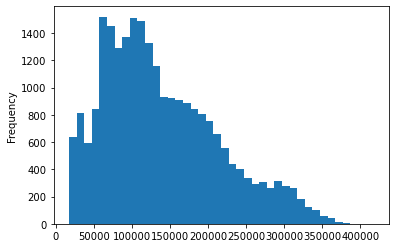

In [14]:
#salary distribution
sal_bin = np.arange(df['salary'].min(),df['salary'].max()+10000,10000)
df['salary'].plot(kind = 'hist',bins = sal_bin);

### <a id = "1">Question 1:<a/>
####  Dynamic Headcount
Generate a table with 3 columns: day, employee_headcount, company_id. 

In [15]:
res = []
unique_dates = pd.date_range(start='2011/01/24', end='2015/12/13')
unique_companies = df['company_id'].unique()
for d in unique_dates:
    for each in unique_companies:
        join_cum = len(df[(df['join_date'] <= d)&(df['company_id']== each)])
        quit_cum = len(df[(df['quit_date'] <= d)&(df['company_id']== each)])
        cum = join_cum - quit_cum
        res.append([d,each,cum])
        
        
#make it a dataframe
headcount = pd.DataFrame(res,columns = ["date","company_id","headcount"])

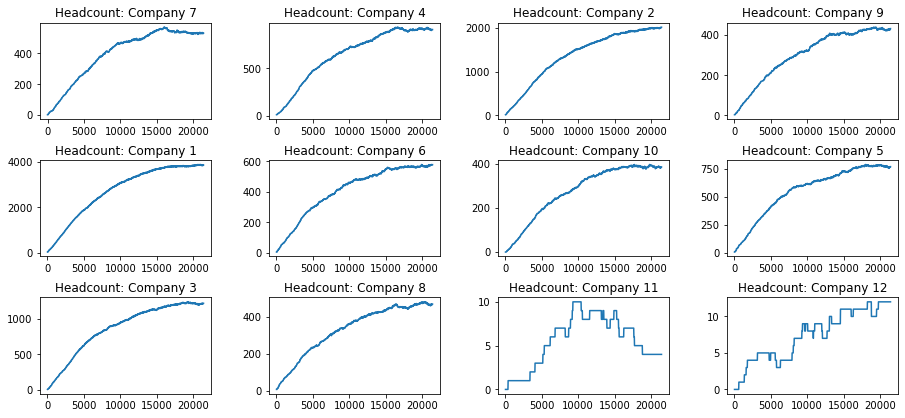

In [16]:
#cumulative headcount by company
fig, axs = plt.subplots(nrows=3, ncols=4, figsize = [13,6])
fig.tight_layout(pad=2.0)
for i,each in enumerate(unique_companies):
    row, col = i//4, i%4
    temp = headcount[headcount['company_id']==each]['headcount']
    axs[row, col].plot(temp);
    axs[row, col].set_title('Headcount: Company '+str(each));

Company 11 and 12 have unusual trend compared to other companies. Instead of a steady headcount growth, the trend fluctuates, especially for company 11, not sure if major event occured, like captial shortage etc. These two companies worth investigating.

In [17]:
headcount.tail(10)

,date,company_id,headcount
21410,2015-12-13,2,2016
21411,2015-12-13,9,432
21412,2015-12-13,1,3865
21413,2015-12-13,6,579
21414,2015-12-13,10,385
21415,2015-12-13,5,772
21416,2015-12-13,3,1218
21417,2015-12-13,8,468
21418,2015-12-13,11,4
21419,2015-12-13,12,12


### <a id="2">Question 2:<a/>
Main Driver that drive employee churn

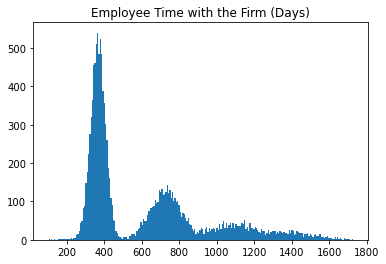

In [18]:
plt.hist(data = df, x='duration',bins = np.arange(df['duration'].min(),df['duration'].max()+7,7));
plt.title("Employee Time with the Firm (Days)");

In [19]:
#create quit_year1 columns for those who quit within 400 days joining the company (around 1 year time)
#if quit around year 1 timeframe, 1, else 0
df['quit_year1'] = np.where(df['duration']<=500,1,0)

In [20]:
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,duration,quit_year1
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585.0,0
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340.0,1
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,NaN,0
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389.0,1
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040.0,0


#### Decision Tree

In [21]:
#create dummies for dept
df_dummy = pd.get_dummies(df[['company_id', 'dept', 'seniority', 'salary', 'quit_year1']], drop_first=True)  

#model features, quit_year1 is the label which is not needed 
train_cols = df_dummy.drop(['quit_year1'], axis=1)

In [22]:
df_dummy.head()

,company_id,seniority,salary,quit_year1,dept_data_science,dept_design,dept_engineer,dept_marketing,dept_sales
0,7,28,89000.0,0,0,0,0,0,0
1,7,20,183000.0,1,0,0,0,1,0
2,4,14,101000.0,0,0,0,0,1,0
3,7,20,115000.0,1,0,0,0,0,0
4,2,23,276000.0,0,1,0,0,0,0


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#if don't specify max_depth, only did one split NEED TO HAVE CLASS WEIGHT = 'BALANCED'
dt=DecisionTreeClassifier(class_weight="balanced",min_impurity_decrease = 0.001) 
dt.fit(train_cols,df_dummy['quit_year1'])

DecisionTreeClassifier(class_weight='balanced', min_impurity_decrease=0.001)

In [24]:
dt.classes_

array([0, 1])

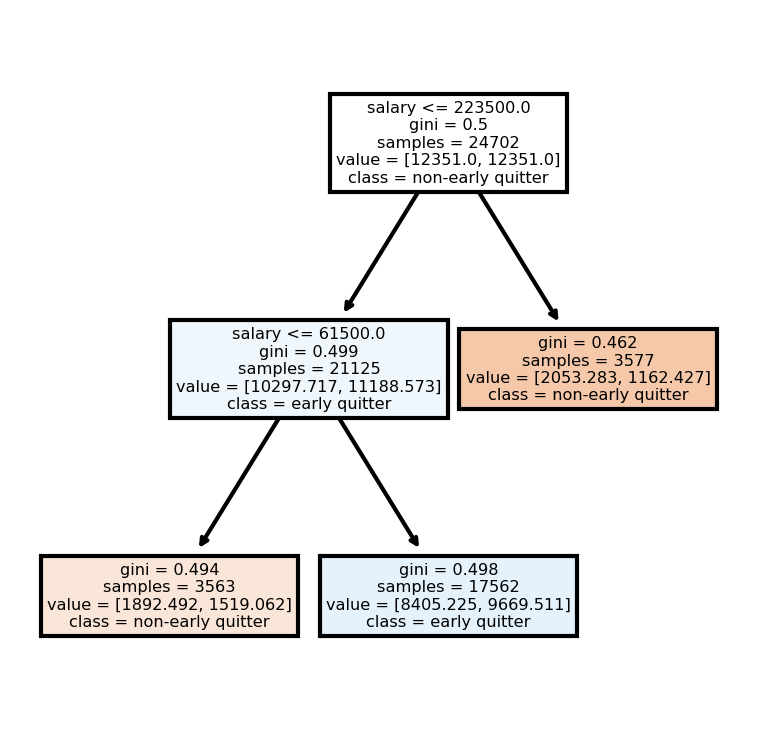

In [25]:
from sklearn import tree
fn=train_cols.columns
#class 0,1
cn=['non-early quitter','early quitter']
fig, axes = plt.subplots(figsize = (3,3), dpi=300)
tree.plot_tree(dt,feature_names = fn, class_names=cn,filled = True);

Salary seems to have the most impact for early quitters. If employees making between 6.15k and 22.35k are more likely to quit early around 1 year time, and people making the most and the least are more loyal to the company.  

In [26]:
#convert salary to its percentiles. We break it into 50 bins. label = False to show actual bin
df['salary_percentile'] = pd.qcut(df['salary'],q=50, labels=False)

In [27]:
#from 0 to 49 corresponding to 50 bins
np.sort(df['salary_percentile'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

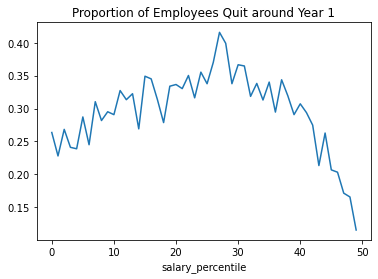

In [28]:
# x is 50 bins for percentile, y is how likely to be a early quitter (1: the most likely, 0: the least likely)
df.groupby('salary_percentile')['quit_year1'].mean().plot(title="Proportion of Employees Quit around Year 1");

The above graph matches the outcome from decision tree which employees who earn a little and employees who earn a lot are not likely to quit.

### <a id="3">Question 3:<a/>
If you could add one variable, what could it be?

Given salary is the most influencial factor, I would like to see if possible how much is their next job offer and I assume it would be better than the job they quit.

I suspect employees making the least probably would be little challenging to find a job probably due to limited skills, etc. On the other hand, people who earn the most are from mangement level which they are already in a comfort zone working with current teams, and the opportunity cost for them to switch a job is very high like it takes time to know new teams and how to manage them, etc.